<a href="https://colab.research.google.com/github/adityaka/misc_scripts/blob/master/AI_ML/TimeSeriesWorkShop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting

## Time Series data is indexed on time.  For eg: Sales by Week, Stock Prices by Date

* If Time Series is Periodic, Time Series is split into Seasonality/Trend/Error components
* If Time Series is not Periodic, We do not have Seasonality, Trends change direction often


1.  **We will study why Regression as technique is not sufficient to predict time series**
2.  **What is the approach ARIMA technique takes in addressing insufficiency**



In [0]:

import math
import random
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA


# Regression Function

In [0]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
  
    fig= plt.figure(figsize=(20,5))
    
    # plotting the actual points as scatter plot 
    plt.plot(x, y, color = "m", marker = "o") 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
    plt.plot(x, y_pred, color = "r", marker = "o") 
#     # plotting the regression line 
#     plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('Time') 
    plt.ylabel('Value') 
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    
    # function to show plot 
    plt.show() 
  
def main(time,values): 
    # estimating coefficients 
    b = estimate_coef(time, values) 
    print("Estimated coefficients: c = {:+.2f}  m = {:+.2f}".format(b[0], b[1])) 
    print("\n")
    print("Estimate for next period ={:+.2f}".format(b[1]*20 + b[0])) 
    print("\n")
    y_pred = b[0] + b[1]*time
    print("RMSE ={:+.10f}".format(math.sqrt(sum(((b[0] + b[1]*time)-values)**2)/(len(time)))))
    print("\n\n")
    
    # plotting regression line 
    plot_regression_line(time, values, b) 

## A simple example to discuss the cons of Regression model in predicting Time Series

Estimated coefficients: c = +1049.23  m = +45.27


Estimate for next period =+1954.56


RMSE =+140.3190455131





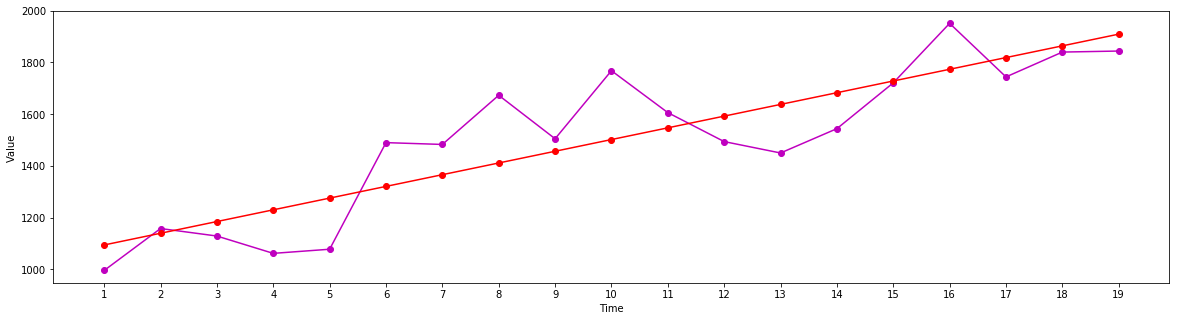

In [0]:
time = np.array(list(range(1,20)))
values = np.array([996,1158,1129,1062,1078,1490,1483,1673,1505,1768,1606,1494,1450,1544,1721,1951,1744,1840,1844]) 
main(time,values)

### Please change historical *values* and see its impacts in prediction and MSE

Note the undue advantage the older timed values hold in predicting new values

**What are the draw backs of predicting time-series using Regression ?**

1. Changing oldest data point in history, can affect the output of the model
2. Long Term Trends Captured, but Short term fluctuations ignored
3. Trend Reversals are not captured
4. Equal Weightage to all points in history
5. Impact of Errors ignored. i.e., Previous errors affect the current output



# ARIMA Approach to Time Series Prediction

ARIMA provides alternative such that most recent values are considered for prediction.  Also the errors in estimated recent values are used for new prediction


ARIMA expects time series to be stationary. 
i.e.
the mean is constant for any continuous set of values in series.  
The mean is constant irrespective of time segment.  The time segment could be first 5 values, last 10 values, values from 3rd to 30th etc.
The variance and covariance is also expected to be constant


The following code generates timeseries
The time series as such is not stationary.  
Taking the difference between consecutive values will negate the trends and make the time series stationary.  This is not guaranteed always.
First order differentiation is one of the methods to obtain stationary time series

New Time Seires can obtained by  **Z<sub>t</sub>=Y<sub>t</sub>-Y<sub>t-1</sub>**



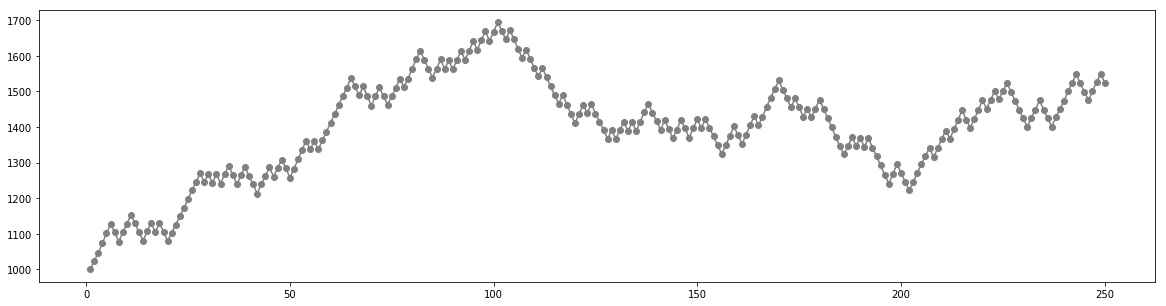

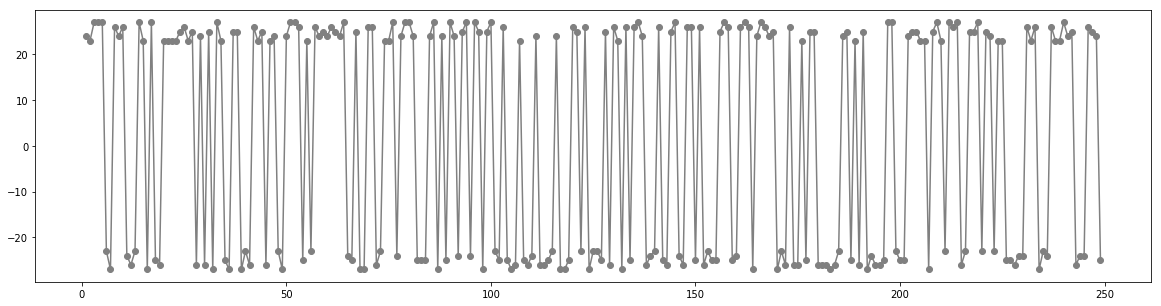

In [0]:
time = np.array(list(range(1,190))) 
previous_value=0
values=[]
time=list(range(1,251))
direction = [-1,1]
for t in time:
    if previous_value==0:
        previous_value=1000
    else:
        previous_value=previous_value+(random.randint(23,27)*direction[random.randint(0,1)])
#         previous_value=previous_value+(random.randint(15,50)*direction[random.randint(0,1)]) if 50<t<100 else previous_value+(random.randint(23,27)*direction[random.randint(0,1)])
#         previous_value=previous_value+(25+random.randint(23,27)*direction[random.randint(0,1)]) if 50<t<100 else previous_value+(random.randint(23,27)*direction[random.randint(0,1)])
    values.append(previous_value)

plt.figure(figsize=(20,5))
plt.plot(time, values, color = "grey", marker = "o") 
plt.show()

plt.figure(figsize=(20,5))
value_d1=[j-i for i, j in zip(values[:-1], values[1:])] 
plt.plot(time[:-1], value_d1, color = "grey", marker = "o") 
plt.show()



**Notice the difference plot.  Is that stationary?  
Can we predict the next value in time series with the help of difference value?**

From difference chart the following notions can be arrived

1. the absolute difference is constant during most part
2. the direction of difference oscillate

**Let us predict the timeseries with regression function and compare later with Arima models**

Estimated coefficients: c = +1298.78  m = +0.78


Estimate for next period =+1314.43


RMSE =+130.8944089696





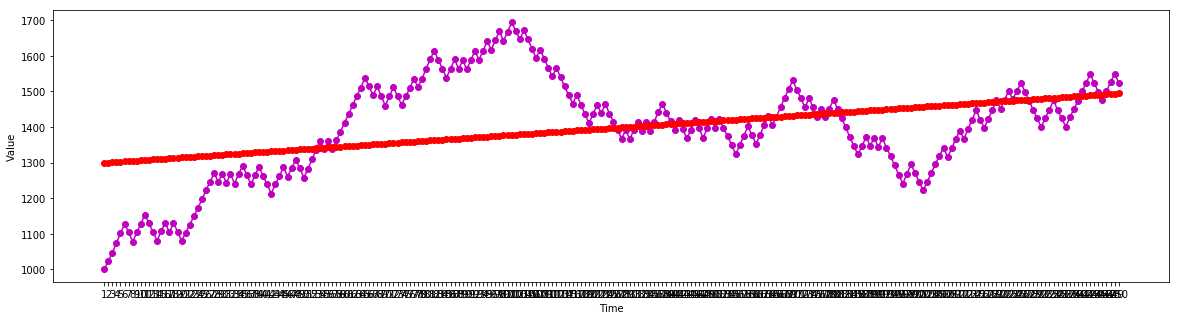

In [0]:
main(np.array(time),np.array(values))

From difference chart the following notions can be arrived

1. the absolute difference is constant during most part
2. the direction of difference oscillate

Z<sub>t</sub> is a stationary series that demonstrates 25 is the difference between points

Henceforth Predicted Y<sub>t</sub> = Y<sub>t-1</sub> +/- 25

Henceforth, let us predict by adding and subtracting the difference alternative to the initial points and predict next points


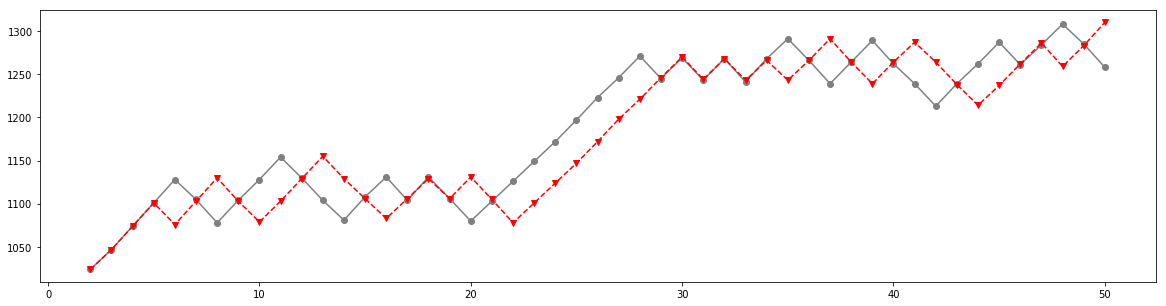

36.37949972168391

In [0]:
predicted=[]
for t in time:
    idx=t-1
    if t<=5:
        predicted.append(values[idx])
    else:
        value=values[idx-1]-25 if values[idx-1]-values[idx-2]>0 else values[idx-1]+25
        predicted.append(value)


plt.figure(figsize=(20,5))
plotrange=[1,50]
plt.plot(time[plotrange[0]:plotrange[1]], values[plotrange[0]:plotrange[1]], color = "grey", marker = "o") 
plt.plot(time[plotrange[0]:plotrange[1]], predicted[plotrange[0]:plotrange[1]], color = "red", marker = "v", linestyle='dashed') 
plt.show()

math.sqrt(sum([(predicted[i]-values[i])**2 for i in range(len(values))])/len(values))

The RMSE improved drastically.  There is still scope to improve.  Let us try to compensate previous errors in the current prediction

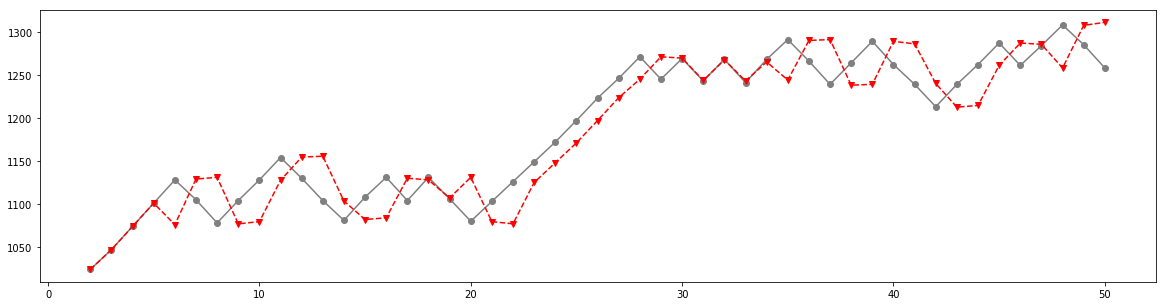

31.819978001249467

In [0]:
predicted=[]
for t in time:
    idx=t-1
    if t<=5:
        predicted.append(values[idx])
        error=0
    else:
        value=values[idx-1]-25 if values[idx-1]-values[idx-2]>0 else values[idx-1]+25
        predicted.append(value+0.5*error)
#         print(values[idx-1]-values[idx-2],values[idx],value+error,error)
        error=values[idx]-value
        
        

plt.figure(figsize=(20,5))
plotrange=[1,50]
plt.plot(time[plotrange[0]:plotrange[1]], values[plotrange[0]:plotrange[1]], color = "grey", marker = "o") 
plt.plot(time[plotrange[0]:plotrange[1]], predicted[plotrange[0]:plotrange[1]], color = "red", marker = "v", linestyle='dashed') 
plt.show()

math.sqrt(sum([(predicted[i]-values[i])**2 for i in range(len(values))])/len(values))

The point is becoming clearer that the If we predict Stationary Series z<sub>t</sub>, the result could be more encouraging

In reality, the stationary distribution may not oscillate as we got in our cooked up example.


Let us see how we can ensure the series is stationary

In [0]:

def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print(df_results)

# AD Fuller Test for Stationarity
if p-value <0.05, the series stationary

else it is not stationary

In [0]:

pd.options.display.float_format = '{:,.5f}'.format
print('Statitionarity test for original series')
print('_________________________________________')
test_stationarity(values)
print('')
print('')
print('Statitionarity test for difference series')
print('_________________________________________')
test_stationarity(value_d1)

Statitionarity test for original series
_________________________________________
Test Statistic          -2.67067
p-value                  0.07925
Lags                     0.00000
Observations           249.00000
Critical Value (1%)     -3.45689
Critical Value (5%)     -2.87322
Critical Value (10%)    -2.57299
dtype: float64


Statitionarity test for difference series
_________________________________________
Test Statistic         -11.80496
p-value                  0.00000
Lags                     1.00000
Observations           247.00000
Critical Value (1%)     -3.45711
Critical Value (5%)     -2.87331
Critical Value (10%)    -2.57304
dtype: float64


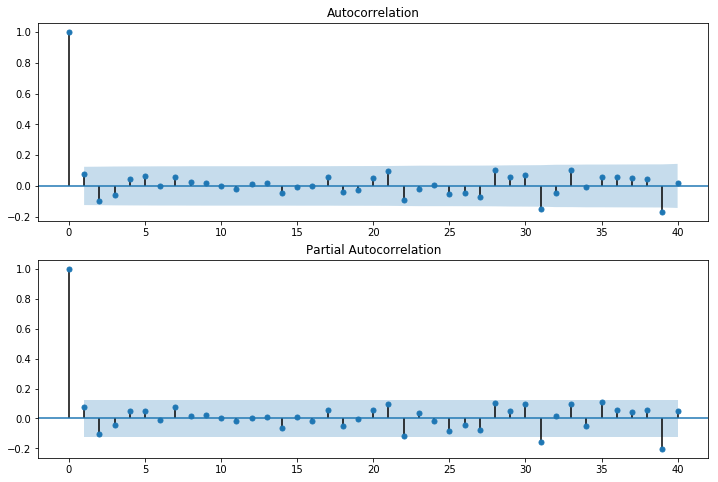

In [0]:
# pip install scipy==1.2 --upgrade
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(value_d1, lags=40, ax=ax1)  
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(value_d1, lags=40, ax=ax2)

# ARIMA
ARIMA stands for Auto-Regressive Integrated Moving Average. There are three integers (p, d, q) that are used to parametrize ARIMA models. Because of that, a nonseasonal ARIMA model is denoted with ARIMA(p, d, q):

**p**  is the number of autoregressive terms (AR part). It allows to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.

**d** is the number of nonseasonal differences needed for stationarity. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.

**q** is the number of lagged forecast errors in the prediction equation (MA part). This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.

When dealing with seasonal effects, as in our example, seasonal ARIMA is used, which is denoted as ARIMA(p,d,q)(P,D,Q)s. Here, (p, d, q) are the nonseasonal parameters described above, (P, D, Q) follow the same definition but are applied to the seasonal component of the time series. The term s is the periodicity of the time series.

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   28
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -133.861
Method:                       css-mle   S.D. of innovations             28.780
Date:                Fri, 24 May 2019   AIC                            273.721
Time:                        23:40:42   BIC                            277.718
Sample:                             2   HQIC                           274.943
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4465      4.117     -0.108      0.914      -8.516       7.623
ar.L1.D2.y    -0.3344      0.184     -1.822      0.080      -0.694       0.025
                                    Roots           

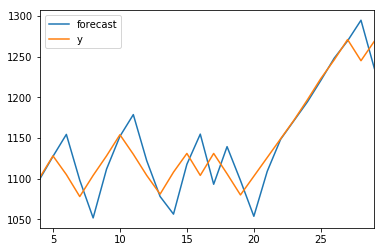

In [0]:

cutoff=30
model = ARIMA(pd.Series(values)[:cutoff], order=(1, 2, 0))  
# model = ARIMA(pd.Series(value_d1)[:cutoff], order=(1, 1, 0))  
results_ARIMA = model.fit()
print(results_ARIMA.summary())

results_ARIMA.plot_predict(dynamic=False)
plt.show()

# plt.plot(value_d1, label='original')
# arima_pred_recent = results_ARIMA.predict(pd.Series(value_d1).index[10], pd.Series(value_d1).index[-1])
# plt.plot(arima_pred_recent, label='Prediction')

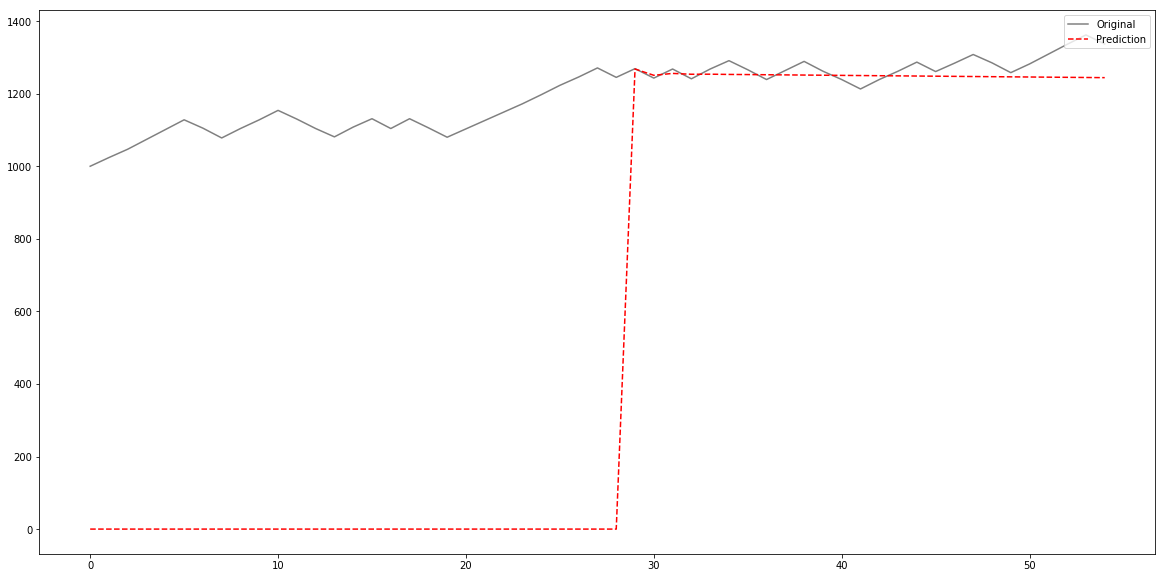

In [0]:
# https://machinelearningmastery.com/make-sample-forecasts-arima-python/
arima_pred_recent = results_ARIMA.predict(pd.Series(values).index[cutoff], pd.Series(values).index[-1])
plt.figure(figsize=(20,10))
plt.plot(values[:cutoff+25], label='Original', color = "grey")
prediction=[]
for i in range(cutoff):
  prediction.append(0)
prediction1=prediction[:]
prediction1[i]=values[cutoff+1]

for i in range(cutoff,len(values)):
  prediction1.append(prediction1[i-1]+arima_pred_recent[i])

  
plt.plot(prediction1[:cutoff+25], label='Prediction', color = "red", linestyle='dashed')
plt.legend(loc=1)



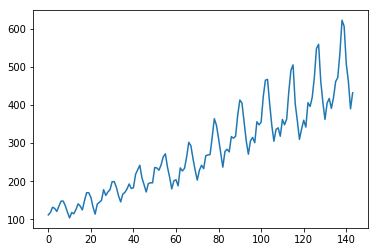

In [0]:
df=pd.DataFrame(Air,columns=['Month','Traffic'])
plt.plot(df['Traffic'], label='Original')

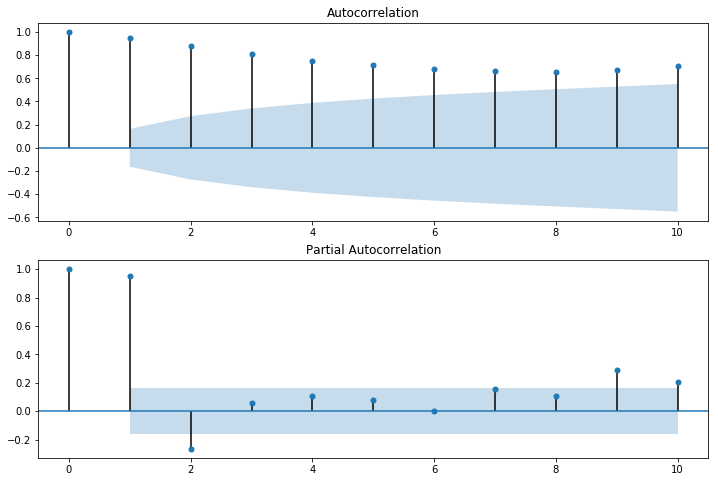

In [0]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Traffic'].tolist(), lags=10, ax=ax1)  
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Traffic'].tolist(), lags=10, ax=ax2)

In [0]:
from statsmodels.tsa.arima_model import ARIMA
cutoff=47+12
model = ARIMA(df['Traffic'][:cutoff], order=(12, 1, 0))  
# model = ARIMA(pd.Series(value_d1), order=(1, 1, 0))  
results_ARIMA = model.fit()
print(results_ARIMA.summary())



/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.Traffic   No. Observations:                   58
Model:                ARIMA(12, 1, 0)   Log Likelihood                -234.977
Method:                       css-mle   S.D. of innovations              8.062
Date:                Fri, 24 May 2019   AIC                            497.953
Time:                        22:45:24   BIC                            526.799
Sample:                             1   HQIC                           509.189
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.1557        nan        nan        nan         nan         nan
ar.L1.D.Traffic     -0.3664        nan        nan        nan         nan         nan
ar.L2.D.Traffic     -0.4559 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:1455: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


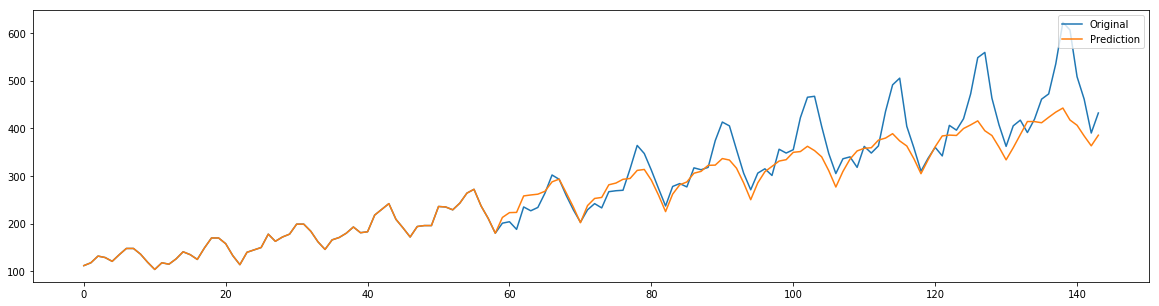

In [0]:
# https://machinelearningmastery.com/make-sample-forecasts-arima-python/

arima_pred_recent = results_ARIMA.predict(df['Traffic'].index[cutoff], df['Traffic'].index[-1])
plt.figure(figsize=(20,5))
plt.plot(df['Traffic'], label='Original')
prediction=[]
for i in range(cutoff):
  prediction.append([df['Traffic'][i]])
#   print(prediction[i-1])
for i in range(cutoff,len(df['Traffic'])):
#   print(arima_pred_recent[i])
  prediction.append(prediction[i-1]+arima_pred_recent[i])
  
plt.plot(prediction, label='Prediction')
plt.legend(loc=1)


In [0]:
# https://github.com/vincent27hugh/Time_Series_ARIMA-GARCH

# https://github.com/rjtgupta/Temperature_Prediction/blob/master/Temperature_Analysis.ipynb
# https://github.com/thao9611/Time_Series_Analysis/blob/master/Time_Series.ipynb

When dealing with seasonal effects, as in our example, seasonal ARIMA is used, which is denoted as ARIMA(p,d,q)(P,D,Q)s. Here, (p, d, q) are the nonseasonal parameters described above, (**P**,**D**, **Q**) follow the same definition but are applied to the seasonal component of the time series. The term s is the periodicity of the time series.

In [0]:
train_data = df[:70]
test_data = df[70:]

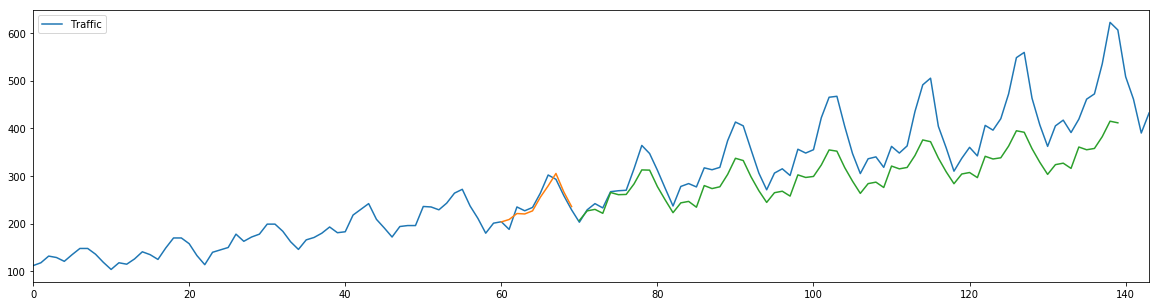

In [0]:
# https://github.com/gmonaci/ARIMA/blob/master/time-series-analysis-ARIMA.ipynb
model = sm.tsa.statespace.SARIMAX(train_data['Traffic'],order=(2, 1, 0),seasonal_order=(1, 1, 0, 12),enforce_stationarity=False,enforce_invertibility=False)
results=model.fit()
ax = df.plot(figsize=(20, 5))
pred0=results.get_prediction(start=60, dynamic=False)
pred0.predicted_mean.plot(ax=ax)
pred1 = results.get_forecast(70)
pred1.predicted_mean.plot(ax=ax)
plt.show()

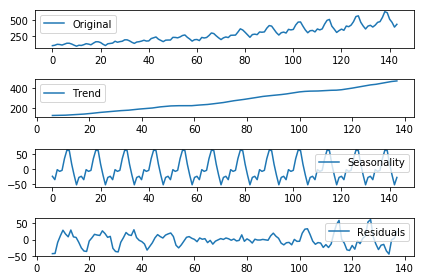

In [0]:

decomposition = seasonal_decompose(df['Traffic'], freq = 12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df['Traffic'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [0]:
Air=[['1949-01',112],
['1949-02',118],
['1949-03',132],
['1949-04',129],
['1949-05',121],
['1949-06',135],
['1949-07',148],
['1949-08',148],
['1949-09',136],
['1949-10',119],
['1949-11',104],
['1949-12',118],
['1950-01',115],
['1950-02',126],
['1950-03',141],
['1950-04',135],
['1950-05',125],
['1950-06',149],
['1950-07',170],
['1950-08',170],
['1950-09',158],
['1950-10',133],
['1950-11',114],
['1950-12',140],
['1951-01',145],
['1951-02',150],
['1951-03',178],
['1951-04',163],
['1951-05',172],
['1951-06',178],
['1951-07',199],
['1951-08',199],
['1951-09',184],
['1951-10',162],
['1951-11',146],
['1951-12',166],
['1952-01',171],
['1952-02',180],
['1952-03',193],
['1952-04',181],
['1952-05',183],
['1952-06',218],
['1952-07',230],
['1952-08',242],
['1952-09',209],
['1952-10',191],
['1952-11',172],
['1952-12',194],
['1953-01',196],
['1953-02',196],
['1953-03',236],
['1953-04',235],
['1953-05',229],
['1953-06',243],
['1953-07',264],
['1953-08',272],
['1953-09',237],
['1953-10',211],
['1953-11',180],
['1953-12',201],
['1954-01',204],
['1954-02',188],
['1954-03',235],
['1954-04',227],
['1954-05',234],
['1954-06',264],
['1954-07',302],
['1954-08',293],
['1954-09',259],
['1954-10',229],
['1954-11',203],
['1954-12',229],
['1955-01',242],
['1955-02',233],
['1955-03',267],
['1955-04',269],
['1955-05',270],
['1955-06',315],
['1955-07',364],
['1955-08',347],
['1955-09',312],
['1955-10',274],
['1955-11',237],
['1955-12',278],
['1956-01',284],
['1956-02',277],
['1956-03',317],
['1956-04',313],
['1956-05',318],
['1956-06',374],
['1956-07',413],
['1956-08',405],
['1956-09',355],
['1956-10',306],
['1956-11',271],
['1956-12',306],
['1957-01',315],
['1957-02',301],
['1957-03',356],
['1957-04',348],
['1957-05',355],
['1957-06',422],
['1957-07',465],
['1957-08',467],
['1957-09',404],
['1957-10',347],
['1957-11',305],
['1957-12',336],
['1958-01',340],
['1958-02',318],
['1958-03',362],
['1958-04',348],
['1958-05',363],
['1958-06',435],
['1958-07',491],
['1958-08',505],
['1958-09',404],
['1958-10',359],
['1958-11',310],
['1958-12',337],
['1959-01',360],
['1959-02',342],
['1959-03',406],
['1959-04',396],
['1959-05',420],
['1959-06',472],
['1959-07',548],
['1959-08',559],
['1959-09',463],
['1959-10',407],
['1959-11',362],
['1959-12',405],
['1960-01',417],
['1960-02',391],
['1960-03',419],
['1960-04',461],
['1960-05',472],
['1960-06',535],
['1960-07',622],
['1960-08',606],
['1960-09',508],
['1960-10',461],
['1960-11',390],
['1960-12',432]]
